In [102]:
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageOps

In [103]:
def rgb2gray(rgb):
	r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
	gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
	return gray

def reshape(img):
	return np.reshape(img, (img.shape[0], img.shape[1], 1))

def get_imgs(domain, path_to_folder=""):
	path = path_to_folder + domain
	img_lst = []
	path_lst = []
	img_df = pd.DataFrame(columns=['img', 'path'])
	# print(path)
	class_id = 0
	for r, d, f in os.walk(path):
		for direct in d:	
			for r, d, f in os.walk(os.path.join(path , direct)):
				for file in f:
					path_to_image = os.path.join(r, file).replace(os.path.sep, '/')
					save_path = path_to_image + ' ' + str(class_id)
					# print(path_to_image)
					image = Image.open(path_to_image)
					# image = ImageOps.grayscale(image)
					# left = 100
					# top = 49
					# right = 698
					# bottom = 583
					# image_crop = image.crop((left, top, right, bottom))
					# image.save(path_to_image)
					img_lst.append(image)
					path_lst.append(save_path)
			class_id += 1
	img_df['img'] = pd.DataFrame(img_lst)
	img_df['path'] = pd.DataFrame(path_lst)
	# path_df = pd.DataFrame(path_lst)
	return img_df

domains = ['optical', 'isar']
# df = get_imgs('isar')
for domain in domains:
	df = get_imgs(domain)
	df['path'].to_csv(f'image_list/{domain}.txt', header=None, index=None)	

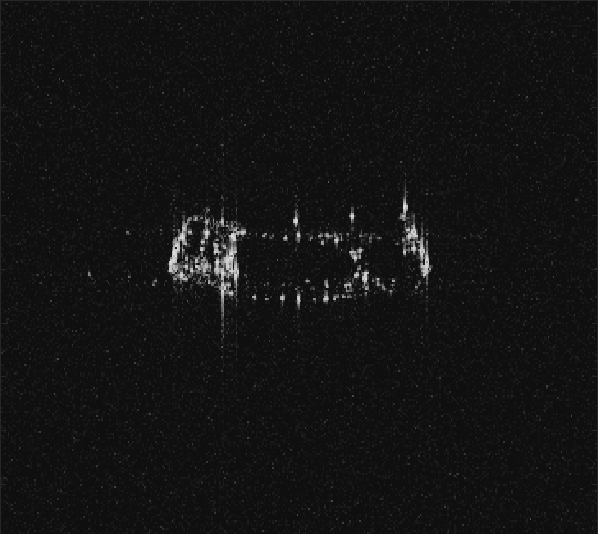

In [104]:
df.iloc[1500]['img']